# Data Preparation and Exploration (35%)
## 1.1 Creating Spark Session (4%)
1. Create a SparkConf object for using as many local cores as possible for a proper application name.
2. Then create a SparkSession using the SparkConf object.

In [1]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "ass2"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# Import SparkSession classes 
from pyspark.sql import SparkSession # Spark SQL

#TODO : Initialize Spark Session and create a SparkContext Object
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext

22/09/30 15:30:00 WARN Utils: Your hostname, lulindeMacBook-Pro.local resolves to a loopback address: 127.0.0.1, but we couldn't find any external IP address!
22/09/30 15:30:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/09/30 15:30:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/09/30 15:30:02 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/09/30 15:30:02 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/09/30 15:30:02 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/09/30 15:30:02 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/0

## 1.2 Loading the Data (16%)
1. Load each data file into two separate Spark dataframes. Then print out the row count and schema of each dataframe.
 - For the Customer data, please specify the schema before reading the data into dataframes, and make sure 'BranchID', 'AssetID', 'ManufacturerID', and 'SupplierID' be read as String types. You may find relevant schema information from the metadata file for the rest of the columns.
 - For the Bureau data, use PySpark to auto-identify the column types.

In [2]:
from pyspark.sql.types import *
customer_schema = StructType([StructField('ID',IntegerType(),True)\
                     ,StructField('Frequency',StringType(),True)\
                     ,StructField('InstlmentMode',StringType(),True)\
                     ,StructField('LoanStatus',StringType(),True)\
                     ,StructField('PaymentMode',StringType(),True)\
                     ,StructField('BranchID',StringType(),True)\
                     ,StructField('Area',StringType(),True)\
                     ,StructField('Tenure',IntegerType(),True)\
                     ,StructField('AssetCost',IntegerType(),True)\
                     ,StructField('AmountFinance',DoubleType(),True)\
                     ,StructField('DisbursalAmount',DoubleType(),True)\
                     ,StructField('EMI',DoubleType(),True)\
                     ,StructField('DisbursalDate',StringType(),True)\
                     ,StructField('MaturityDAte',StringType(),True)\
                     ,StructField('AuthDate',StringType(),True)\
                     ,StructField('AssetID',StringType(),True)\
                     ,StructField('ManufacturerID',StringType(),True)\
                     ,StructField('SupplierID',StringType(),True)\
                     ,StructField('LTV',DoubleType(),True)\
                     ,StructField('SEX',StringType(),True)\
                     ,StructField('AGE',IntegerType(),True)\
                     ,StructField('MonthlyIncome',DoubleType(),True)\
                     ,StructField('City',StringType(),True)\
                     ,StructField('State',StringType(),True)\
                     ,StructField('ZiPCODE',IntegerType(),True)\
                     ,StructField('Top-up Month',StringType(),True)])

In [3]:
df_customer = spark.read.format('csv')\
            .option('header',True)\
            .schema(customer_schema)\
            .load('customer.csv')

In [4]:
df_customer.toPandas()

22/09/30 15:30:06 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


ID Frequency InstlmentMode LoanStatus   PaymentMode BranchID  \
0            1   Monthly        Arrear     Closed         PDC_E        1   
1            2   Monthly       Advance     Closed           PDC      333   
2            3   Quatrly        Arrear     Active  Direct Debit        1   
3            4   Monthly       Advance     Closed         PDC_E        2   
4            5   Monthly       Advance     Closed           PDC        2   
...        ...       ...           ...        ...           ...      ...   
143395  143396   Monthly        Arrear     Closed           PDC      143   
143396  143397   Monthly        Arrear     Closed           PDC       32   
143397  143398   Monthly        Arrear     Closed           PDC       32   
143398  143399   Monthly        Arrear     Closed         PDC_E      246   
143399  143400   Monthly        Arrear     Closed         PDC_E      246   

                              Area  Tenure  AssetCost  AmountFinance  ...  \
0                             None      48     450000       275000.0  ...   
1                           BHOPAL      47     485000       350000.0  ...   
2                             None      68     690000       519728.0  ...   
3                             GUNA      46     480000       365000.0  ...   
4                             GUNA      45     480000       285000.0  ...   
...                            ...     ...        ...            ...  ...   
143395  NEW DELHI BARAKHAMBHA ROAD      35     530016       419616.0  ...   
143396           BANGALORE LALBAGH      36     595000       446500.0  ...   
143397           BANGALORE LALBAGH      36     595000       446500.0  ...   
143398                     BIKANER      12     400000       280000.0  ...   
143399                     BIKANER      12     400000       280000.0  ...   

        ManufacturerID  SupplierID    LTV   SEX   AGE MonthlyIncome  \
0                 1568       21946  61.11     M  49.0      35833.33   
1                 1062       34802  70.00     M  23.0        666.67   
2                 1060      127335  69.77     M  39.0      45257.00   
3                 1046       22354  75.83     M  50.0      32069.00   
4                 1046       22354  57.44     M  35.0      25000.00   
...                ...         ...    ...   ...   ...           ...   
143395            1046       22094  79.17  None   NaN           NaN   
143396            2721       61196  75.04  None   NaN           NaN   
143397            2721       61196  75.04  None   NaN           NaN   
143398            1046       63565  70.00     M   NaN           NaN   
143399            1046       63565  70.00     M   NaN           NaN   

              City           State   ZiPCODE       Top-up Month  
0           RAISEN  MADHYA PRADESH  464993.0        > 48 Months  
1           SEHORE  MADHYA PRADESH  466001.0  No Top-up Service  
2           BHOPAL  MADHYA PRADESH  462030.0       12-18 Months  
3             GUNA  MADHYA PRADESH  473001.0       36-48 Months  
4             GUNA  MADHYA PRADESH  473001.0       18-24 Months  
...            ...             ...       ...                ...  
143395     GURGAON         HARYANA  122001.0       12-18 Months  
143396   BANGALORE       KARNATAKA  560020.0       12-18 Months  
143397   BANGALORE       KARNATAKA  560020.0        > 48 Months  
143398  GANGANAGAR       RAJASTHAN  335001.0       12-18 Months  
143399  GANGANAGAR       RAJASTHAN  335001.0       30-36 Months  

[143400 rows x 26 columns]

In [5]:
df_customer.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Frequency: string (nullable = true)
 |-- InstlmentMode: string (nullable = true)
 |-- LoanStatus: string (nullable = true)
 |-- PaymentMode: string (nullable = true)
 |-- BranchID: string (nullable = true)
 |-- Area: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- AssetCost: integer (nullable = true)
 |-- AmountFinance: double (nullable = true)
 |-- DisbursalAmount: double (nullable = true)
 |-- EMI: double (nullable = true)
 |-- DisbursalDate: string (nullable = true)
 |-- MaturityDAte: string (nullable = true)
 |-- AuthDate: string (nullable = true)
 |-- AssetID: string (nullable = true)
 |-- ManufacturerID: string (nullable = true)
 |-- SupplierID: string (nullable = true)
 |-- LTV: double (nullable = true)
 |-- SEX: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- MonthlyIncome: double (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZiPCODE: integer (nu

In [6]:
print('row is:'+ str(df_customer.count()))

row is:143400


In [7]:
df_bureau = spark.read.format('csv')\
            .option('header',True)\
            .option('inferSchema', True)\
            .load('bureau.csv')

In [8]:
#df_bureau.toPandas()

In [9]:
df_bureau.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR: boolean (nullable = true)
 |-- MATCH-TYPE: string (nullable = true)
 |-- ACCT-TYPE: string (nullable = true)
 |-- CONTRIBUTOR-TYPE: string (nullable = true)
 |-- DATE-REPORTED: string (nullable = true)
 |-- OWNERSHIP-IND: string (nullable = true)
 |-- ACCOUNT-STATUS: string (nullable = true)
 |-- DISBURSED-DT: string (nullable = true)
 |-- CLOSE-DT: string (nullable = true)
 |-- LAST-PAYMENT-DATE: string (nullable = true)
 |-- CREDIT-LIMIT/SANC AMT: string (nullable = true)
 |-- DISBURSED-AMT/HIGH CREDIT: string (nullable = true)
 |-- INSTALLMENT-AMT: string (nullable = true)
 |-- CURRENT-BAL: string (nullable = true)
 |-- INSTALLMENT-FREQUENCY: string (nullable = true)
 |-- OVERDUE-AMT: string (nullable = true)
 |-- WRITE-OFF-AMT: integer (nullable = true)
 |-- ASSET_CLASS: string (nullable = true)
 |-- REPORTED DATE - HIST: string (nullable = true)
 |-- DPD - HIST: string (nullable = true)
 |-- CUR BAL - HIST: string (nulla

In [10]:
print('row is:'+ str(df_bureau.count()))

row is:624863


2. For the Bureau dataframe, convert all string columns containing ',' to numeric columns (For example: '50,000' → 50000). For the 'INSTALLMENT-AMT' you also need to remove the postfix(For example: '1,405/Monthly' -> 1405).

In [11]:
import re
from pyspark.sql.functions import *
from pyspark.sql.types import *
#df_bureau.sample(False,0.1).show(1,False,True)

In [12]:
a = ['CREDIT-LIMIT/SANC AMT' ,'DISBURSED-AMT/HIGH CREDIT','INSTALLMENT-AMT','CURRENT-BAL','OVERDUE-AMT']

In [13]:
def changestrtoint(clo_str):
    if clo_str:
        b = ''.join([c for c in clo_str if c in '-1234567890'])
        return int(b)
    else:
        return clo_str


In [14]:
changestrtointUDF = udf(changestrtoint,IntegerType())

In [15]:
df_bureau\
        .select(col('CREDIT-LIMIT/SANC AMT'),changestrtointUDF(col('CREDIT-LIMIT/SANC AMT'))).show(truncate=False)

+---------------------+-------------------------------------+
|CREDIT-LIMIT/SANC AMT|changestrtoint(CREDIT-LIMIT/SANC AMT)|
+---------------------+-------------------------------------+
|null                 |null                                 |
|null                 |null                                 |
|null                 |null                                 |
|null                 |null                                 |
|null                 |null                                 |
|50,000               |50000                                |
|null                 |null                                 |
|null                 |null                                 |
|null                 |null                                 |
|null                 |null                                 |
|null                 |null                                 |
|null                 |null                                 |
|null                 |null                                 |
|null   

In [16]:
for i in a:
    df_bureau = df_bureau.withColumn(i,changestrtointUDF(col(i)))# have null value, use double

In [17]:
df_bureau.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR: boolean (nullable = true)
 |-- MATCH-TYPE: string (nullable = true)
 |-- ACCT-TYPE: string (nullable = true)
 |-- CONTRIBUTOR-TYPE: string (nullable = true)
 |-- DATE-REPORTED: string (nullable = true)
 |-- OWNERSHIP-IND: string (nullable = true)
 |-- ACCOUNT-STATUS: string (nullable = true)
 |-- DISBURSED-DT: string (nullable = true)
 |-- CLOSE-DT: string (nullable = true)
 |-- LAST-PAYMENT-DATE: string (nullable = true)
 |-- CREDIT-LIMIT/SANC AMT: integer (nullable = true)
 |-- DISBURSED-AMT/HIGH CREDIT: integer (nullable = true)
 |-- INSTALLMENT-AMT: integer (nullable = true)
 |-- CURRENT-BAL: integer (nullable = true)
 |-- INSTALLMENT-FREQUENCY: string (nullable = true)
 |-- OVERDUE-AMT: integer (nullable = true)
 |-- WRITE-OFF-AMT: integer (nullable = true)
 |-- ASSET_CLASS: string (nullable = true)
 |-- REPORTED DATE - HIST: string (nullable = true)
 |-- DPD - HIST: string (nullable = true)
 |-- CUR BAL - HIST: string (

In [18]:
df_bureau.show(5,vertical=True,truncate = False)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 ID                        | 1                                                                                                                                                                                                                                                                                                                                    
 SELF-INDICATOR            | false                                                                                                                                                                                                                                                                

Traceback (most recent call last):
  File "/opt/anaconda3/envs/FIT5202/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/opt/anaconda3/envs/FIT5202/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/opt/anaconda3/envs/FIT5202/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 643, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/opt/anaconda3/envs/FIT5202/lib/python3.8/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError


3. Show how many rows contain a null value in the Customer dataframe, and remove all rows which contain any null value.

In [19]:
df_customer \
    .select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df_customer.columns]).show(1,vertical=True,truncate = False)

-RECORD 0----------------
 ID              | 0     
 Frequency       | 0     
 InstlmentMode   | 0     
 LoanStatus      | 0     
 PaymentMode     | 0     
 BranchID        | 0     
 Area            | 12199 
 Tenure          | 0     
 AssetCost       | 0     
 AmountFinance   | 0     
 DisbursalAmount | 0     
 EMI             | 0     
 DisbursalDate   | 0     
 MaturityDAte    | 1     
 AuthDate        | 0     
 AssetID         | 0     
 ManufacturerID  | 2     
 SupplierID      | 0     
 LTV             | 0     
 SEX             | 64    
 AGE             | 66    
 MonthlyIncome   | 248   
 City            | 11256 
 State           | 0     
 ZiPCODE         | 373   
 Top-up Month    | 0     



In [20]:
df_customer = df_customer.na.drop()

In [21]:
df_customer \
    .select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in df_customer.columns]).show(1,vertical=True,truncate = False)

-RECORD 0--------------
 ID              | 0   
 Frequency       | 0   
 InstlmentMode   | 0   
 LoanStatus      | 0   
 PaymentMode     | 0   
 BranchID        | 0   
 Area            | 0   
 Tenure          | 0   
 AssetCost       | 0   
 AmountFinance   | 0   
 DisbursalAmount | 0   
 EMI             | 0   
 DisbursalDate   | 0   
 MaturityDAte    | 0   
 AuthDate        | 0   
 AssetID         | 0   
 ManufacturerID  | 0   
 SupplierID      | 0   
 LTV             | 0   
 SEX             | 0   
 AGE             | 0   
 MonthlyIncome   | 0   
 City            | 0   
 State           | 0   
 ZiPCODE         | 0   
 Top-up Month    | 0   



4. Show the null percentage of all columns in the Bureau dataframe, and drop the columns whose percentage of null is larger than 20% since those columns might have less influence on our accuracy.

In [22]:
df123=df_bureau \
    .select([(count(when(col(c).isNull(),c))/count('*')).alias(c) for c in df_bureau.columns]) \
    .toPandas()

#count('*'): calculate the % for each column (null/all)

In [23]:
df123

ID  SELF-INDICATOR  MATCH-TYPE  ACCT-TYPE  CONTRIBUTOR-TYPE  \
0  0.0             0.0         0.0        0.0               0.0   

   DATE-REPORTED  OWNERSHIP-IND  ACCOUNT-STATUS  DISBURSED-DT  CLOSE-DT  ...  \
0       0.005894            0.0             0.0      0.051522  0.453237  ...   

   INSTALLMENT-FREQUENCY  OVERDUE-AMT  WRITE-OFF-AMT  ASSET_CLASS  \
0               0.757571     0.211275       0.034702     0.536562   

   REPORTED DATE - HIST  DPD - HIST  CUR BAL - HIST  AMT OVERDUE - HIST  \
0              0.034702    0.035547        0.034702            0.034702   

   AMT PAID - HIST    TENURE  
0         0.036754  0.657727  

[1 rows x 25 columns]

In [24]:
dro_list = []
        
for i in df123:
    if df123[i].values>0.2:
        dro_list.append(i)
    
    

In [25]:
dro_list

['CLOSE-DT',
 'LAST-PAYMENT-DATE',
 'CREDIT-LIMIT/SANC AMT',
 'INSTALLMENT-AMT',
 'INSTALLMENT-FREQUENCY',
 'OVERDUE-AMT',
 'ASSET_CLASS',
 'TENURE']

In [26]:
#df_bureau = df_bureau.drop(' '.join(map(str,dro_list)))
df_bureau = df_bureau.drop(*dro_list)
#https://www.geeksforgeeks.org/python-star-or-asterisk-operator/

In [27]:
df_bureau.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR: boolean (nullable = true)
 |-- MATCH-TYPE: string (nullable = true)
 |-- ACCT-TYPE: string (nullable = true)
 |-- CONTRIBUTOR-TYPE: string (nullable = true)
 |-- DATE-REPORTED: string (nullable = true)
 |-- OWNERSHIP-IND: string (nullable = true)
 |-- ACCOUNT-STATUS: string (nullable = true)
 |-- DISBURSED-DT: string (nullable = true)
 |-- DISBURSED-AMT/HIGH CREDIT: integer (nullable = true)
 |-- CURRENT-BAL: integer (nullable = true)
 |-- WRITE-OFF-AMT: integer (nullable = true)
 |-- REPORTED DATE - HIST: string (nullable = true)
 |-- DPD - HIST: string (nullable = true)
 |-- CUR BAL - HIST: string (nullable = true)
 |-- AMT OVERDUE - HIST: string (nullable = true)
 |-- AMT PAID - HIST: string (nullable = true)



5. Remove all columns containing 'HIST’ in the columns’ names for the bureau dataframe and all columns related to ‘time’ (the columns’ names contained “DATE” or “DT”) in the bureau dataframe, as they are hard to be merged in the following process.

In [28]:
dropclo = [i for i in df_bureau.columns if('HIST' in i) | ('DATE' in i) | ('DT' in i)]

In [29]:
dropclo

['DATE-REPORTED',
 'DISBURSED-DT',
 'REPORTED DATE - HIST',
 'DPD - HIST',
 'CUR BAL - HIST',
 'AMT OVERDUE - HIST',
 'AMT PAID - HIST']

In [30]:
#df_bureau = df_bureau.drop(''.join(map(str,dropclo)))
df_bureau = df_bureau.drop(*dropclo)

In [31]:
df_bureau \
    .select([(count(when(col(c).isNull(),c))/count('*')).alias(c) for c in df_bureau.columns]) \
    .show(1,vertical=True,truncate = False)

-RECORD 0-----------------------------------------
 ID                        | 0.0                  
 SELF-INDICATOR            | 0.0                  
 MATCH-TYPE                | 0.0                  
 ACCT-TYPE                 | 0.0                  
 CONTRIBUTOR-TYPE          | 0.0                  
 OWNERSHIP-IND             | 0.0                  
 ACCOUNT-STATUS            | 0.0                  
 DISBURSED-AMT/HIGH CREDIT | 6.081333028199781E-5 
 CURRENT-BAL               | 4.2409296117709E-4   
 WRITE-OFF-AMT             | 0.03470200667986423  



In [32]:
df_bureau.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR: boolean (nullable = true)
 |-- MATCH-TYPE: string (nullable = true)
 |-- ACCT-TYPE: string (nullable = true)
 |-- CONTRIBUTOR-TYPE: string (nullable = true)
 |-- OWNERSHIP-IND: string (nullable = true)
 |-- ACCOUNT-STATUS: string (nullable = true)
 |-- DISBURSED-AMT/HIGH CREDIT: integer (nullable = true)
 |-- CURRENT-BAL: integer (nullable = true)
 |-- WRITE-OFF-AMT: integer (nullable = true)



# 1.3 Exploring the data (15%)
1. For each feature in each activity, show the basic statistics (including count, mean, std dev, min, max); for each non-numeric feature in each activity, display the top-10 values and the corresponding counts.
 - No need to show the “Top-up Month” and “ID” columns.

In [33]:
numeric_customer = []
for i in df_customer.dtypes:
    if (i[1] in ['int','double']) & (i[0] not in  ['ID','Top-up Month']):
        numeric_customer.append(i[0])

In [34]:
numeric_customer

['Tenure',
 'AssetCost',
 'AmountFinance',
 'DisbursalAmount',
 'EMI',
 'LTV',
 'AGE',
 'MonthlyIncome',
 'ZiPCODE']

In [35]:
df_customer.select(numeric_customer).describe().toPandas()

summary              Tenure         AssetCost       AmountFinance  \
0   count              121308            121308              121308   
1    mean   42.75597652257065  563289.852482936  356361.52626380784   
2  stddev  22.433473986085676  103558.845010007  105717.74807158226   
3     min                   5            200000             50000.0   
4     max                 501           2250000           1308351.0   

      DisbursalAmount                EMI                 LTV  \
0              121308             121308              121308   
1   356002.3838225838  56821.71514731098   59.62412924127006   
2  105537.25852397796  28585.22968535343  15.818416557893888   
3              2894.0              200.0               -1.38   
4           1308351.0           460000.0               100.0   

                  AGE       MonthlyIncome             ZiPCODE  
0              121308              121308              121308  
1   40.70355623701652  51901.613624658035  421356.78347676987  
2  11.794657218312981  1774582.5522165147   170779.1124976431  
3                  18                 0.0              110000  
4                  90          6.174775E8              855456

In [36]:
numeric_bureau = []
for i in df_bureau.dtypes:
    if (i[1] in ['int','double']) & (i[0] not in  ['ID','Top-up Month']):
        numeric_bureau.append(i[0])

In [37]:
numeric_bureau

['DISBURSED-AMT/HIGH CREDIT', 'CURRENT-BAL', 'WRITE-OFF-AMT']

In [38]:
df_bureau.select(numeric_bureau).describe().toPandas()

summary DISBURSED-AMT/HIGH CREDIT         CURRENT-BAL      WRITE-OFF-AMT
0   count                    624825              624598             603179
1    mean         316589.3861433201  103717.07101207497  291.3442643062839
2  stddev         5176936.446701582     851087.59757868  19561.75231589788
3     min                    -83878           -20868956                -30
4     max                 999999999           375991329            8797356

In [39]:
str_customer = []
for i in df_customer.dtypes:
    if (i[1] in ['string']) & (i[0] not in  ['ID','Top-up Month']):
        str_customer.append(i[0])

In [40]:
str_customer

['Frequency',
 'InstlmentMode',
 'LoanStatus',
 'PaymentMode',
 'BranchID',
 'Area',
 'DisbursalDate',
 'MaturityDAte',
 'AuthDate',
 'AssetID',
 'ManufacturerID',
 'SupplierID',
 'SEX',
 'City',
 'State']

In [41]:
df_customer.select(str_customer).describe().show(10)

+-------+----------+-------------+----------+-----------+------------------+-----------+-------------------+-------------------+-------------------+--------------------+------------------+------------------+------+-----------------+--------------+
|summary| Frequency|InstlmentMode|LoanStatus|PaymentMode|          BranchID|       Area|      DisbursalDate|       MaturityDAte|           AuthDate|             AssetID|    ManufacturerID|        SupplierID|   SEX|             City|         State|
+-------+----------+-------------+----------+-----------+------------------+-----------+-------------------+-------------------+-------------------+--------------------+------------------+------------------+------+-----------------+--------------+
|  count|    121308|       121308|    121308|     121308|            121308|     121308|             121308|             121308|             121308|              121308|            121308|            121308|121308|           121308|        121308|
|   mean

In [42]:
str_bureau = []
for i in df_customer.dtypes:
    if (i[1] in ['string']) & (i[0] not in  ['ID','Top-up Month']):
        str_bureau.append(i[0])

In [43]:
str_bureau

['Frequency',
 'InstlmentMode',
 'LoanStatus',
 'PaymentMode',
 'BranchID',
 'Area',
 'DisbursalDate',
 'MaturityDAte',
 'AuthDate',
 'AssetID',
 'ManufacturerID',
 'SupplierID',
 'SEX',
 'City',
 'State']

In [44]:
df_customer.select(str_bureau).describe().toPandas()

summary   Frequency InstlmentMode LoanStatus PaymentMode  \
0   count      121308        121308     121308      121308   
1    mean        None          None       None        None   
2  stddev        None          None       None        None   
3     min  BI-Monthly       Advance     Active  Auto Debit   
4     max     Quatrly        Arrear     Closed   SI Reject   

             BranchID         Area        DisbursalDate         MaturityDAte  \
0              121308       121308               121308               121308   
1  177.22737989250504         None                 None                 None   
2  115.61521339478618         None                 None                 None   
3                 106    AHMEDABAD  2010-02-09 00:00:00  2011-03-18 00:00:00   
4                  95  YAMUNANAGAR  2019-11-23 00:00:00  2059-08-10 00:00:00   

              AuthDate               AssetID      ManufacturerID  \
0               121308                121308              121308   
1                 None  1.7927881963407196E7  1167.1337751838296   
2                 None     8414293.293245012   258.2598942763564   
3  2010-02-09 00:00:00              10013048                1019   
4  2019-11-23 00:00:00               9985761                3473   

           SupplierID     SEX               City           State  
0              121308  121308             121308          121308  
1    58526.1314257922    None              932.4            None  
2  36498.128312673645    None  872.8510091708242            None  
3              100132       F               1947  ANDHRA PRADESH  
4               99991       M           YAVATMAL     WEST BENGAL

2. Merged rows in the Bureau dataframe by 'ID’. To achieve this question, sum the rows for numeric type columns, count distinct values for other columns with other data types, and rename them with the postfix like '_sum' or '_dist'. (For example, we did the sum function based on the 'HIGH CREDIT', and the new column’s name will be 'HIGH CREDIT_sum').
- Sum/distinct is just a simple way to merge the rows, after merging, they may lose some information, but it is an easy way to combine information together. And also helps us to reduce the size of the module.

In [45]:
df_bureau.dtypes

[('ID', 'int'),
 ('SELF-INDICATOR', 'boolean'),
 ('MATCH-TYPE', 'string'),
 ('ACCT-TYPE', 'string'),
 ('CONTRIBUTOR-TYPE', 'string'),
 ('OWNERSHIP-IND', 'string'),
 ('ACCOUNT-STATUS', 'string'),
 ('DISBURSED-AMT/HIGH CREDIT', 'int'),
 ('CURRENT-BAL', 'int'),
 ('WRITE-OFF-AMT', 'int')]

In [46]:
merg = [sum(i[0]).alias(f'{i[0]}_sum') if i[1] == 'int' else concat_ws(',',collect_set(i[0])).alias(f'{i[0]}_dist')for i in df_bureau.dtypes[1:]]
merg

# concat_ws : The CONCAT_WS() function adds two or more expressions together with a separator.
# concat_ws: put all data in one root, dont want have array type data, like in Match_type
#https://www.w3schools.com/sql/func_mysql_concat_ws.asp

[Column<'concat_ws(,, collect_set(SELF-INDICATOR)) AS `SELF-INDICATOR_dist`'>,
 Column<'concat_ws(,, collect_set(MATCH-TYPE)) AS `MATCH-TYPE_dist`'>,
 Column<'concat_ws(,, collect_set(ACCT-TYPE)) AS `ACCT-TYPE_dist`'>,
 Column<'concat_ws(,, collect_set(CONTRIBUTOR-TYPE)) AS `CONTRIBUTOR-TYPE_dist`'>,
 Column<'concat_ws(,, collect_set(OWNERSHIP-IND)) AS `OWNERSHIP-IND_dist`'>,
 Column<'concat_ws(,, collect_set(ACCOUNT-STATUS)) AS `ACCOUNT-STATUS_dist`'>,
 Column<'sum(DISBURSED-AMT/HIGH CREDIT) AS `DISBURSED-AMT/HIGH CREDIT_sum`'>,
 Column<'sum(CURRENT-BAL) AS `CURRENT-BAL_sum`'>,
 Column<'sum(WRITE-OFF-AMT) AS `WRITE-OFF-AMT_sum`'>]

In [47]:
df_bureau132 = df_bureau \
    .groupby('ID') \
    .agg(*merg)
#agg()need be col not list

In [48]:
df_bureau132.toPandas()

ID SELF-INDICATOR_dist MATCH-TYPE_dist  \
0          148          false,true         PRIMARY   
1          463                true         PRIMARY   
2          471                true         PRIMARY   
3          496          false,true         PRIMARY   
4          833          false,true         PRIMARY   
...        ...                 ...             ...   
143395  142961          false,true         PRIMARY   
143396  142990                true         PRIMARY   
143397  143004          false,true         PRIMARY   
143398  143162          false,true         PRIMARY   
143399  143190                true         PRIMARY   

                                           ACCT-TYPE_dist  \
0       Business Loan Priority Sector  Agriculture,Aut...   
1                                            Tractor Loan   
2                                            Tractor Loan   
3       Business Loan Priority Sector  Agriculture,Aut...   
4       Gold Loan,Business Loan Priority Sector  Other...   
...                                                   ...   
143395                                       Tractor Loan   
143396                                       Tractor Loan   
143397                                       Tractor Loan   
143398         Credit Card,Kisan Credit Card,Tractor Loan   
143399                                       Tractor Loan   

       CONTRIBUTOR-TYPE_dist          OWNERSHIP-IND_dist  \
0                    NBF,PRB                  Individual   
1                        NBF                  Individual   
2                        NBF                  Individual   
3                        NBF  Individual,Guarantor,Joint   
4                NBF,RRB,NAB                  Individual   
...                      ...                         ...   
143395               NBF,PRB                  Individual   
143396                   NBF                  Individual   
143397                   NBF            Individual,Joint   
143398           NBF,COP,RRB                  Individual   
143399                   NBF                  Individual   

             ACCOUNT-STATUS_dist  DISBURSED-AMT/HIGH CREDIT_sum  \
0                  Closed,Active                        1305000   
1                         Closed                         220000   
2                         Closed                         300000   
3       Delinquent,Closed,Active                        7116120   
4                  Closed,Active                        1004583   
...                          ...                            ...   
143395                    Closed                        1002862   
143396                    Active                         454153   
143397             Closed,Active                         805516   
143398  Delinquent,Closed,Active                         924944   
143399                    Active                         587000   

        CURRENT-BAL_sum  WRITE-OFF-AMT_sum  
0                 55218                  0  
1                     0                  0  
2                     0                  0  
3               4464362                  0  
4                224000                  0  
...                 ...                ...  
143395                0                  0  
143396           261200                  0  
143397           273938                  0  
143398          1112756                  0  
143399           421094                  0  

[143400 rows x 10 columns]

In [49]:
df_bureau132.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- SELF-INDICATOR_dist: string (nullable = false)
 |-- MATCH-TYPE_dist: string (nullable = false)
 |-- ACCT-TYPE_dist: string (nullable = false)
 |-- CONTRIBUTOR-TYPE_dist: string (nullable = false)
 |-- OWNERSHIP-IND_dist: string (nullable = false)
 |-- ACCOUNT-STATUS_dist: string (nullable = false)
 |-- DISBURSED-AMT/HIGH CREDIT_sum: long (nullable = true)
 |-- CURRENT-BAL_sum: long (nullable = true)
 |-- WRITE-OFF-AMT_sum: long (nullable = true)



3. Join the two dataframe with 'ID' by using inner join, then replace the 'Top-up Month' column with a new 'Top-up' column which uses 0 to indicate this customer has 'No Top-up Service' in the 'Top-up Month' column and uses 1 to indicate customer has any type of ‘Top-up Services’ except ‘No Top-up Service’.

In [50]:
df = df_customer.join(df_bureau132, 'ID')
df.toPandas()

ID    Frequency InstlmentMode LoanStatus   PaymentMode BranchID  \
0          833      Quatrly        Arrear     Closed         PDC_E      309   
1         1088      Quatrly        Arrear     Closed           PDC       68   
2         1342      Quatrly        Arrear     Closed         PDC_E      141   
3         1645      Monthly        Arrear     Closed         PDC_E       25   
4         1829      Quatrly        Arrear     Closed           PDC      198   
...        ...          ...           ...        ...           ...      ...   
121303  142908  Half Yearly        Arrear     Active           ECS      337   
121304  142961  Half Yearly        Arrear     Closed           PDC      338   
121305  142990  Half Yearly        Arrear     Active  Direct Debit      341   
121306  143004  Half Yearly        Arrear     Active           ECS      341   
121307  143162  Half Yearly        Arrear     Active  Direct Debit      343   

                                Area  Tenure  AssetCost  AmountFinance  ...  \
0                              HUBLI      36     630595       341227.0  ...   
1                             NASHIK      24     550000       300000.0  ...   
2       LUDHIANA FEROZ GANDHI MARKET      36     620000       400000.0  ...   
3                             KARNAL      48     360000       253350.0  ...   
4                               KOTA      48     450000       305000.0  ...   
...                              ...     ...        ...            ...  ...   
121303                        INDORE      46     270000       161431.0  ...   
121304                        RAJKOT      24     650000       302862.0  ...   
121305                        JAIPUR      49     640000       454153.0  ...   
121306                        JAIPUR      48     600000       453866.0  ...   
121307                        BHOPAL      60     665000       516944.0  ...   

             Top-up Month  SELF-INDICATOR_dist MATCH-TYPE_dist  \
0       No Top-up Service           false,true         PRIMARY   
1       No Top-up Service           false,true         PRIMARY   
2       No Top-up Service                 true         PRIMARY   
3       No Top-up Service           false,true         PRIMARY   
4            24-30 Months           false,true         PRIMARY   
...                   ...                  ...             ...   
121303  No Top-up Service           false,true         PRIMARY   
121304  No Top-up Service           false,true         PRIMARY   
121305  No Top-up Service                 true         PRIMARY   
121306  No Top-up Service           false,true         PRIMARY   
121307       24-30 Months           false,true         PRIMARY   

                                           ACCT-TYPE_dist  \
0       Gold Loan,Business Loan Priority Sector  Other...   
1       Credit Card,Auto Loan (Personal),Other,Consume...   
2                                            Tractor Loan   
3                                            Tractor Loan   
4       Gold Loan,Auto Loan (Personal),Other,Consumer ...   
...                                                   ...   
121303                                 Other,Tractor Loan   
121304                                       Tractor Loan   
121305                                       Tractor Loan   
121306                                       Tractor Loan   
121307         Credit Card,Kisan Credit Card,Tractor Loan   

       CONTRIBUTOR-TYPE_dist          OWNERSHIP-IND_dist  \
0                NBF,RRB,NAB                  Individual   
1                    NBF,PRB                  Individual   
2                        NBF                  Individual   
3                        NBF        Individual,Guarantor   
4                    NBF,PRB  Individual,Guarantor,Joint   
...                      ...                         ...   
121303               NBF,COP                  Individual   
121304               NBF,PRB                  Individual   
121305                   NBF                  In

In [51]:
df133 = df.withColumn('Top-up Month',when(col('Top-up Month') == 'No Top-up Service', 0).otherwise(1)) \
    .withColumnRenamed('Top-up Month','Top-up')

In [52]:
df133.toPandas()

ID    Frequency InstlmentMode LoanStatus   PaymentMode BranchID  \
0          833      Quatrly        Arrear     Closed         PDC_E      309   
1         1088      Quatrly        Arrear     Closed           PDC       68   
2         1342      Quatrly        Arrear     Closed         PDC_E      141   
3         1645      Monthly        Arrear     Closed         PDC_E       25   
4         1829      Quatrly        Arrear     Closed           PDC      198   
...        ...          ...           ...        ...           ...      ...   
121303  142908  Half Yearly        Arrear     Active           ECS      337   
121304  142961  Half Yearly        Arrear     Closed           PDC      338   
121305  142990  Half Yearly        Arrear     Active  Direct Debit      341   
121306  143004  Half Yearly        Arrear     Active           ECS      341   
121307  143162  Half Yearly        Arrear     Active  Direct Debit      343   

                                Area  Tenure  AssetCost  AmountFinance  ...  \
0                              HUBLI      36     630595       341227.0  ...   
1                             NASHIK      24     550000       300000.0  ...   
2       LUDHIANA FEROZ GANDHI MARKET      36     620000       400000.0  ...   
3                             KARNAL      48     360000       253350.0  ...   
4                               KOTA      48     450000       305000.0  ...   
...                              ...     ...        ...            ...  ...   
121303                        INDORE      46     270000       161431.0  ...   
121304                        RAJKOT      24     650000       302862.0  ...   
121305                        JAIPUR      49     640000       454153.0  ...   
121306                        JAIPUR      48     600000       453866.0  ...   
121307                        BHOPAL      60     665000       516944.0  ...   

        Top-up  SELF-INDICATOR_dist MATCH-TYPE_dist  \
0            0           false,true         PRIMARY   
1            0           false,true         PRIMARY   
2            0                 true         PRIMARY   
3            0           false,true         PRIMARY   
4            1           false,true         PRIMARY   
...        ...                  ...             ...   
121303       0           false,true         PRIMARY   
121304       0           false,true         PRIMARY   
121305       0                 true         PRIMARY   
121306       0           false,true         PRIMARY   
121307       1           false,true         PRIMARY   

                                           ACCT-TYPE_dist  \
0       Gold Loan,Business Loan Priority Sector  Other...   
1       Credit Card,Auto Loan (Personal),Other,Consume...   
2                                            Tractor Loan   
3                                            Tractor Loan   
4       Gold Loan,Auto Loan (Personal),Other,Consumer ...   
...                                                   ...   
121303                                 Other,Tractor Loan   
121304                                       Tractor Loan   
121305                                       Tractor Loan   
121306                                       Tractor Loan   
121307         Credit Card,Kisan Credit Card,Tractor Loan   

       CONTRIBUTOR-TYPE_dist          OWNERSHIP-IND_dist  \
0                NBF,RRB,NAB                  Individual   
1                    NBF,PRB                  Individual   
2                        NBF                  Individual   
3                        NBF        Individual,Guarantor   
4                    NBF,PRB  Individual,Guarantor,Joint   
...                      ...                         ...   
121303               NBF,COP                  Individual   
121304               NBF,PRB                  Individual   
121305                   NBF                  Individual   
121306                   NBF            Individual,Joint   
121307           NBF,COP,RRB                  Individual   


4. For each bureau and customer data, present two plots worthy of presenting to the MonPG company, describe your plots and discuss the findings from the plots
 - Hint - 1: you can use the basic plots (e.g. histograms, line charts, scatter plots) for the relationship between a column and the “Top-up” label (such as “city” and “Top-up”, “age” and “Top-up”); or more advanced plots like correlation plots for the relationship between each column; 2: if your data is too large for the plotting, consider using sampling before plotting
 - 100 words max for each plot’s description and discussion

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
DF_customer = df_customer.toPandas()
DF_df = df.toPandas()

In [55]:
#https://www.kaggle.com/code/vanshikajuneja/ml-application-on-loan-default-data
DF_customer['target'] = np.where(DF_customer['Top-up Month']=='No Top-up Service', 0, 1)
DF_customer['target'].value_counts(normalize = True)

0    0.740281
1    0.259719
Name: target, dtype: float64

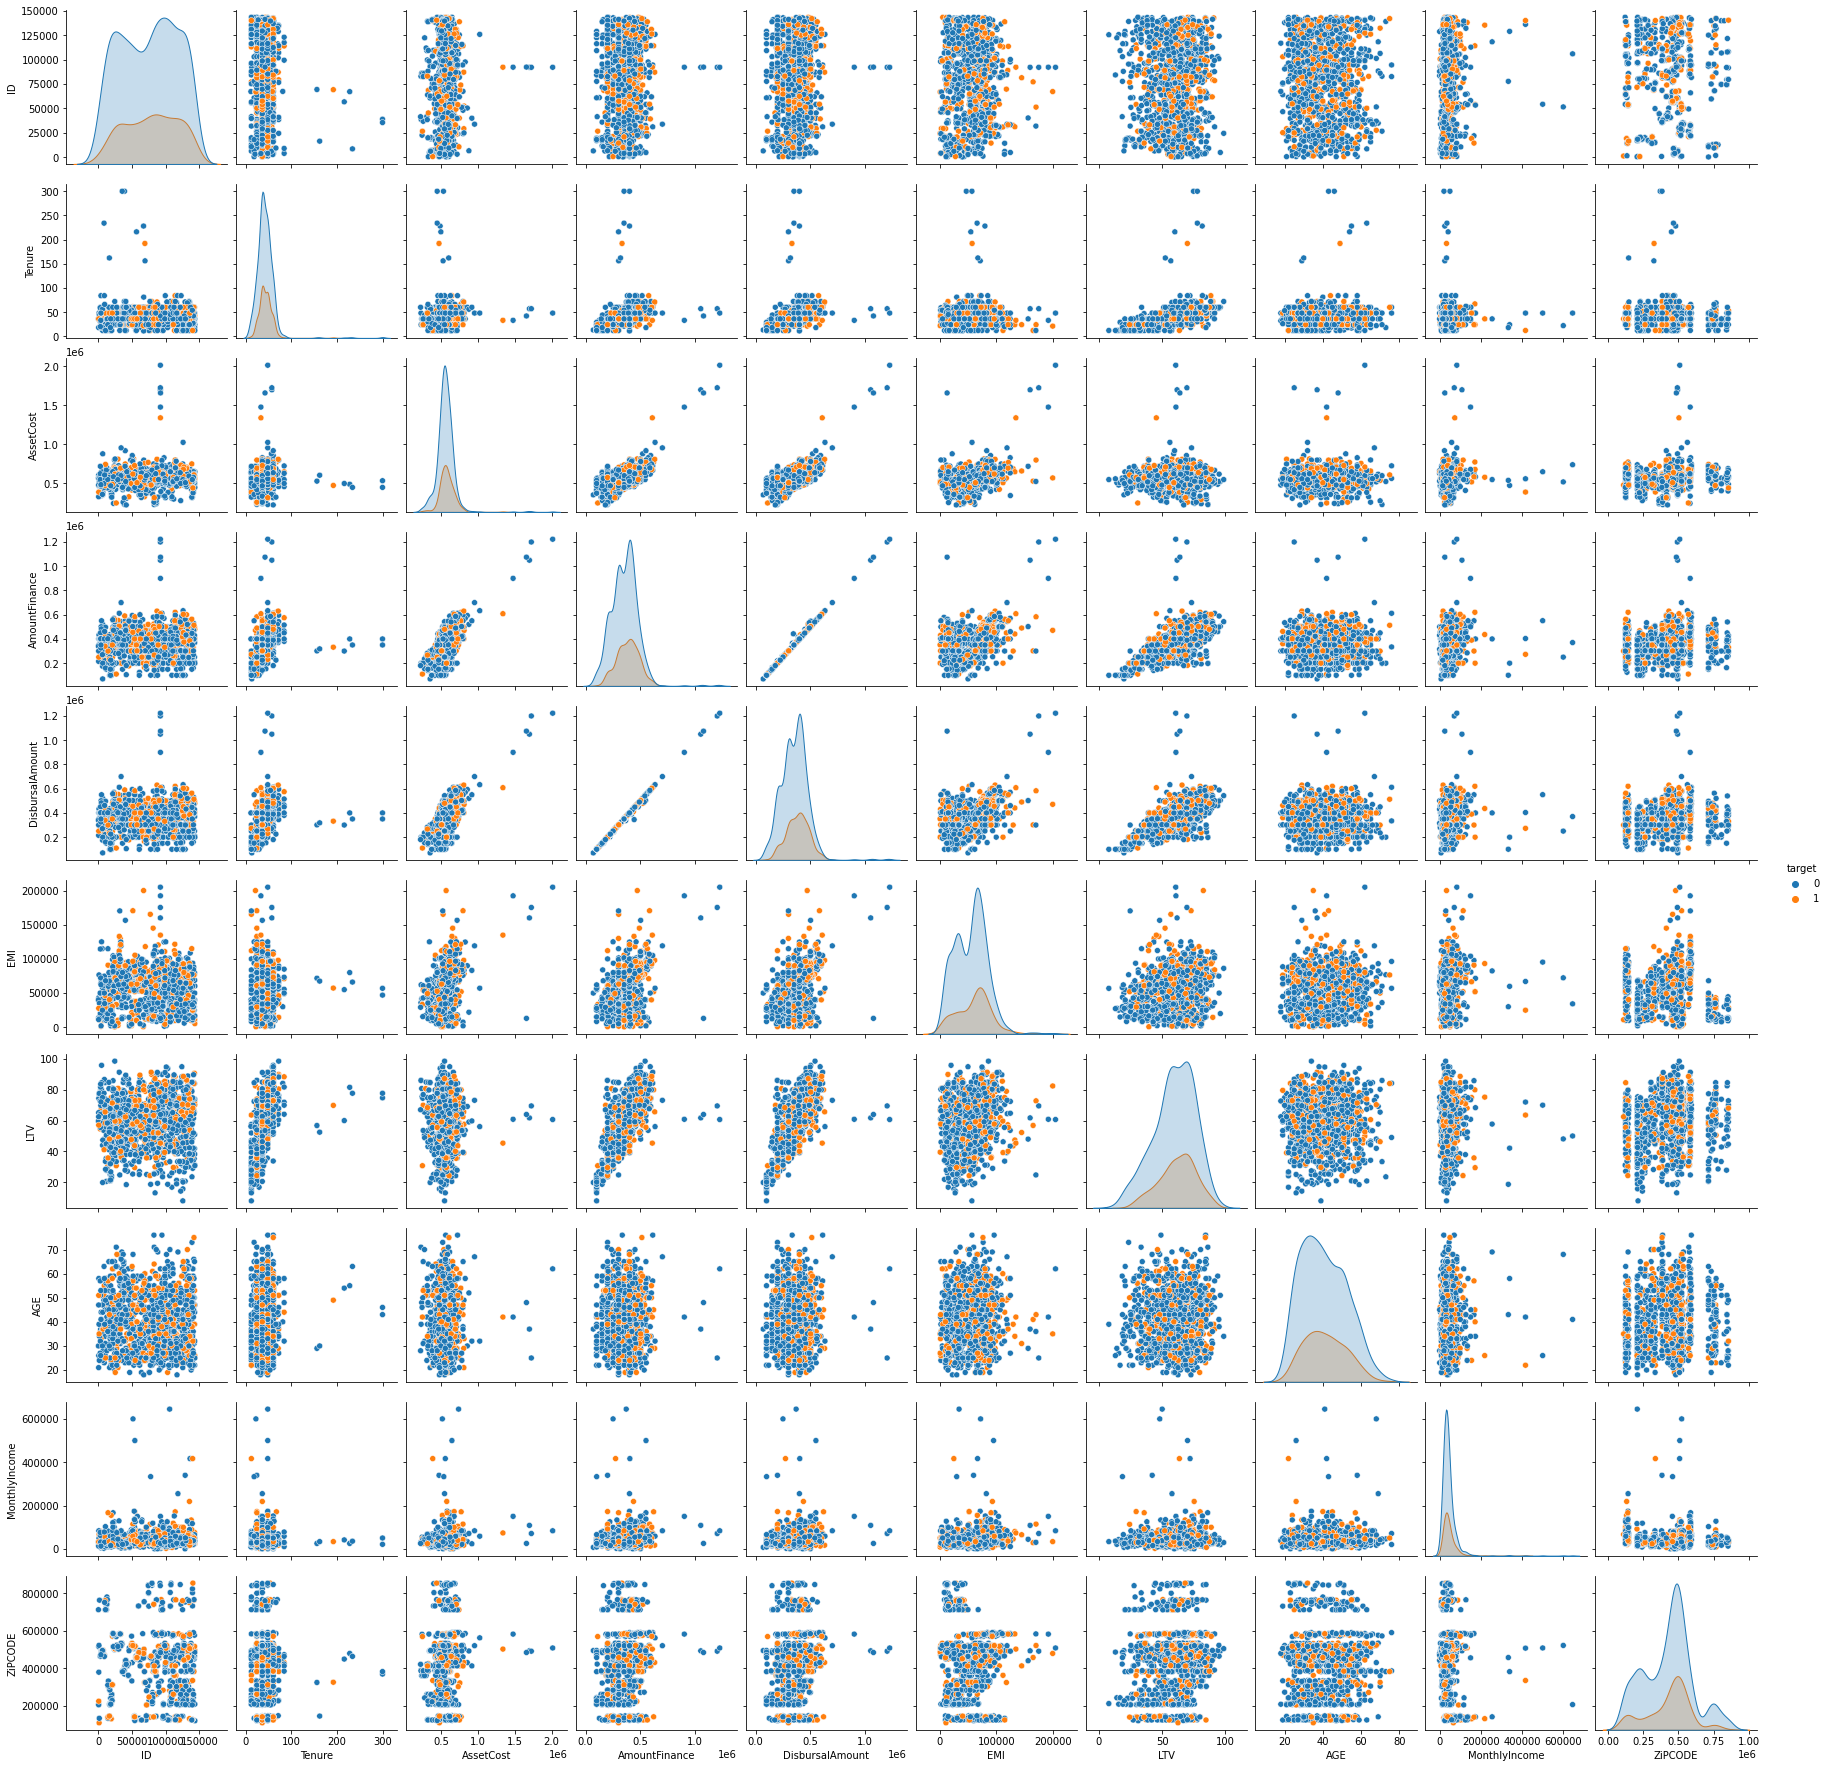

In [56]:
sns.pairplot(DF_customer.sample(frac = 0.01,random_state = 1),hue = 'target',height = 2.5)

According to the scatter plot, the data of text and number types basically coincide together, which makes it difficult to detect patterns and is accompanied by outliers. It is necessary to further debug the feature for a more explicit analysis in the future. The diagonals show the distribution pattern. Statistically this is a PDF. It can be seen that there are some cases of outliers, and the others are in line with the normal distribution law, and the distribution law of top-up is similar when it is equal to 0 and 1. But the probability of being equal to 0 is the probability of being more important than 1. This is because there is a big difference in the divination of the two types of data. Therefore, it is recommended to change the number of sample data to ensure consistent observation.

In [57]:
DF_df['target'] = np.where(DF_df['Top-up Month']=='No Top-up Service', 0, 1)
DF_df['target'].value_counts(normalize = True)

0    0.740281
1    0.259719
Name: target, dtype: float64

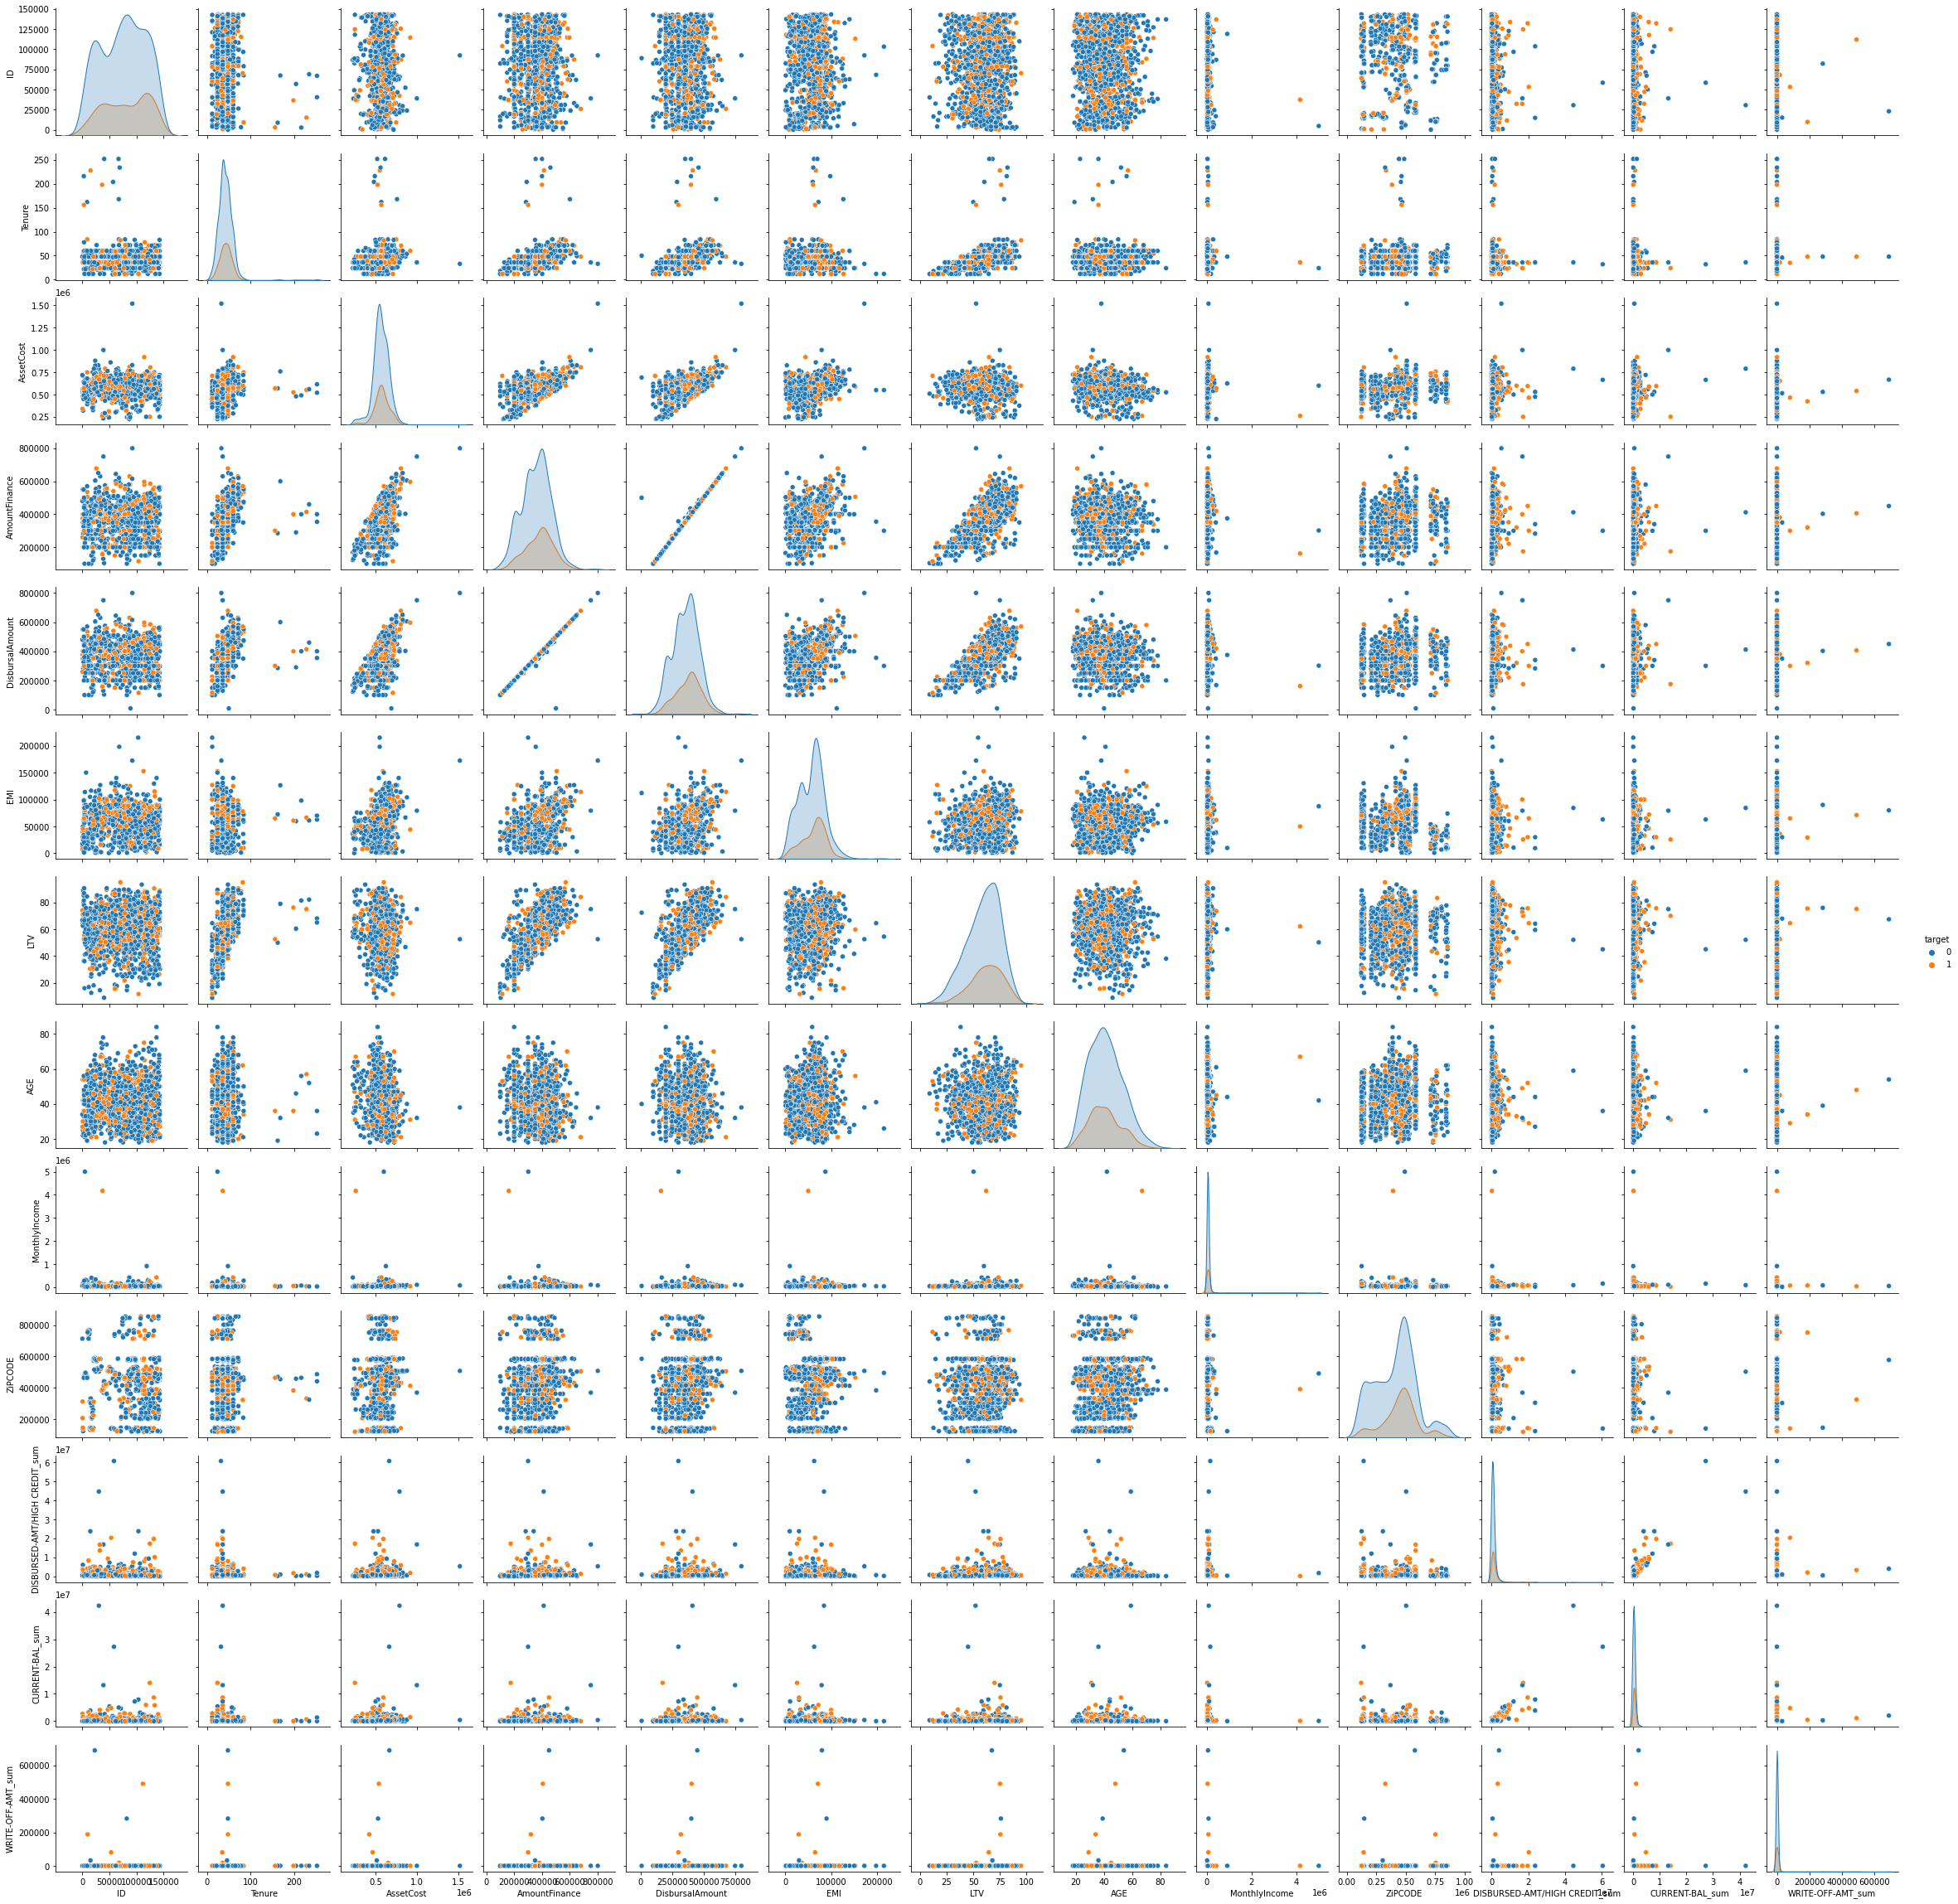

In [58]:
sns.pairplot(DF_df.sample(frac = 0.01,random_state = 1),hue = 'target',height = 2.5)

According to the scatter plot, the data of text and number types basically coincide together, which makes it difficult to detect patterns and is accompanied by outliers. It is necessary to further debug the feature for a more explicit analysis in the future. The diagonals show the distribution pattern. Statistically this is a PDF. It can be seen that there are some cases of outliers, and the others are in line with the normal distribution law, and the distribution law of top-up is similar when it is equal to 0 and 1. But the probability of being equal to 0 is the probability of being more important than 1. This is because there is a big difference in the divination of the two types of data. Therefore, it is recommended to change the number of sample data to ensure consistent observation.

# 2. Feature extraction and ML training (55%)

## 2.1 Preparing the training data and testing data (4%)
1. Randomly split the dataset into 80% training data and 20% testing data for each use case.


In [59]:
train, test = df133.randomSplit([0.8, 0.2], seed = 2020)

2. Show the number of rows with different "Top-up" values of the training dataframe. Only use 20% Top-up rows to prepare rebalanced training data, with Top-Up rows and non-Top up rows being a 1:2 ratio.
- Hint - you can use undersampling to get the rebalanced training data

In [60]:
train.groupBy('Top-up').count().show()

+------+-----+
|Top-up|count|
+------+-----+
|     1|25075|
|     0|71805|
+------+-----+



In [61]:
train0 = train[train['Top-up'] == 0]
train1 = train[train['Top-up'] == 1]

In [62]:
train0.toPandas()

ID    Frequency InstlmentMode LoanStatus   PaymentMode BranchID  \
0         833      Quatrly        Arrear     Closed         PDC_E      309   
1        1088      Quatrly        Arrear     Closed           PDC       68   
2        1342      Quatrly        Arrear     Closed         PDC_E      141   
3        1645      Monthly        Arrear     Closed         PDC_E       25   
4        1959  Half Yearly        Arrear     Closed        Billed      343   
...       ...          ...           ...        ...           ...      ...   
71800  140518      Monthly        Arrear     Closed         PDC_E      271   
71801  141318  Half Yearly        Arrear     Closed  Direct Debit      278   
71802  141327  Half Yearly        Arrear     Active  Direct Debit      278   
71803  142908  Half Yearly        Arrear     Active           ECS      337   
71804  143004  Half Yearly        Arrear     Active           ECS      341   

                               Area  Tenure  AssetCost  AmountFinance  ...  \
0                             HUBLI      36     630595       341227.0  ...   
1                            NASHIK      24     550000       300000.0  ...   
2      LUDHIANA FEROZ GANDHI MARKET      36     620000       400000.0  ...   
3                            KARNAL      48     360000       253350.0  ...   
4                            BHOPAL      60     670000       550000.0  ...   
...                             ...     ...        ...            ...  ...   
71800                       LUCKNOW      42     450000       330000.0  ...   
71801                         HUBLI      60     730000       590000.0  ...   
71802                         HUBLI      60     650000       455000.0  ...   
71803                        INDORE      46     270000       161431.0  ...   
71804                        JAIPUR      48     600000       453866.0  ...   

       Top-up  SELF-INDICATOR_dist MATCH-TYPE_dist  \
0           0           false,true         PRIMARY   
1           0           false,true         PRIMARY   
2           0                 true         PRIMARY   
3           0           false,true         PRIMARY   
4           0                 true         PRIMARY   
...       ...                  ...             ...   
71800       0                 true         PRIMARY   
71801       0           false,true         PRIMARY   
71802       0                 true         PRIMARY   
71803       0           false,true         PRIMARY   
71804       0           false,true         PRIMARY   

                                          ACCT-TYPE_dist  \
0      Gold Loan,Business Loan Priority Sector  Other...   
1      Credit Card,Auto Loan (Personal),Other,Consume...   
2                                           Tractor Loan   
3                                           Tractor Loan   
4                                           Tractor Loan   
...                                                  ...   
71800                                       Tractor Loan   
71801               Commercial Vehicle Loan,Tractor Loan   
71802                                       Tractor Loan   
71803                                 Other,Tractor Loan   
71804                                       Tractor Loan   

      CONTRIBUTOR-TYPE_dist    OWNERSHIP-IND_dist  \
0               NBF,RRB,NAB            Individual   
1                   NBF,PRB            Individual   
2                       NBF            Individual   
3                       NBF  Individual,Guarantor   
4                       NBF            Individual   
...                     ...                   ...   
71800                   NBF            Individual   
71801                   NBF            Individual   
71802                   NBF            Individual   
71803               NBF,COP            Individual   
71804                   NBF      Individual,Joint   

                     ACCOUNT-STATUS_dist DISBURSED-AMT/HIGH CREDIT_sum  \
0                          Closed,Active                

In [63]:
train1_20 = train1.sample(fraction = 0.2)
train0_20 = train0.sample(fraction = train1_20.count()*2/train0.count())

In [64]:
train_20 = train0_20.union(train1_20).cache() #merge sample train1_20 and train0_20

In [65]:
train_20.groupBy('Top-up').count().show()

+------+-----+
|Top-up|count|
+------+-----+
|     1| 5019|
|     0|10155|
+------+-----+



# 2.2 Preparing Features, Labels, and Models (16%)
1. Which features would you select based on the above data exploration? Discuss the reason for selecting them and how you plan to further transform them.
- 400 words max for the discussion
- Hint - things to consider include whether to scale the numeric data, whether to choose one-hot encoding or string-indexing for a specific model
- As MonPG only has a server with limited resources. Please try to make the training process less tedious by removing the redundant/unnecessary columns that will not significantly impact the results.
- Another hint: try to understand the performance impact of the model for each column. For example, in the “SupplierID” column, they have more than 4500 different types. That means those columns will burden the training process.

In [66]:
train_20.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Frequency: string (nullable = true)
 |-- InstlmentMode: string (nullable = true)
 |-- LoanStatus: string (nullable = true)
 |-- PaymentMode: string (nullable = true)
 |-- BranchID: string (nullable = true)
 |-- Area: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- AssetCost: integer (nullable = true)
 |-- AmountFinance: double (nullable = true)
 |-- DisbursalAmount: double (nullable = true)
 |-- EMI: double (nullable = true)
 |-- DisbursalDate: string (nullable = true)
 |-- MaturityDAte: string (nullable = true)
 |-- AuthDate: string (nullable = true)
 |-- AssetID: string (nullable = true)
 |-- ManufacturerID: string (nullable = true)
 |-- SupplierID: string (nullable = true)
 |-- LTV: double (nullable = true)
 |-- SEX: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- MonthlyIncome: double (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZiPCODE: integer (nu

In [67]:
train_20.show()

+-----+-----------+-------------+----------+------------+--------+------------------+------+---------+-------------+---------------+-------+-------------------+-------------------+-------------------+--------+--------------+----------+-----+---+---+-------------+--------------+--------------+-------+------+-------------------+---------------+--------------------+---------------------+--------------------+--------------------+-----------------------------+---------------+-----------------+
|   ID|  Frequency|InstlmentMode|LoanStatus| PaymentMode|BranchID|              Area|Tenure|AssetCost|AmountFinance|DisbursalAmount|    EMI|      DisbursalDate|       MaturityDAte|           AuthDate| AssetID|ManufacturerID|SupplierID|  LTV|SEX|AGE|MonthlyIncome|          City|         State|ZiPCODE|Top-up|SELF-INDICATOR_dist|MATCH-TYPE_dist|      ACCT-TYPE_dist|CONTRIBUTOR-TYPE_dist|  OWNERSHIP-IND_dist| ACCOUNT-STATUS_dist|DISBURSED-AMT/HIGH CREDIT_sum|CURRENT-BAL_sum|WRITE-OFF-AMT_sum|
+-----+-----

In [68]:
train_20df = train_20.toPandas()
train_20df.nunique()

ID                               15174
Frequency                            4
InstlmentMode                        2
LoanStatus                           2
PaymentMode                         11
BranchID                           184
Area                                93
Tenure                             106
AssetCost                         1803
AmountFinance                     4437
DisbursalAmount                   4324
EMI                               5354
DisbursalDate                     2227
MaturityDAte                       451
AuthDate                          2180
AssetID                          15174
ManufacturerID                      11
SupplierID                        2826
LTV                               5258
SEX                                  2
AGE                                 66
MonthlyIncome                     2560
City                               406
State                               19
ZiPCODE                           4991
Top-up                   

In [69]:
catcol = ['PaymentMode','SEX','Top-up','ACCOUNT-STATUS_dist']
numcol = ['LTV','AGE','ZiPCODE','MonthlyIncome']

For the selection of the above columns, it can be seen from the previous relationship analysis that there are many outliers. Therefore, we select columns with relatively few outliers first when making our selection. For STR columns I selected 'PaymentMode','SEX',' top-month ',' account-status_dist 'for analysis and int types 'LTV','AGE','ZiPCODE'. Firstly, because there are relatively few outliers, and secondly, the selection of these columns is based on my knowledge of finance, and I think these columns will have an impact on the model. At the same time, the data types of these columns are relatively few, which will not cause a large burden on model training.

2. Create Transformers / Estimators for transforming/assembling the features you selected above in 2.2.1
- (Bonus Task 5%) Create a custom Transformer for the column “Frequency” so that the types of policy, ["Monthly", "BI-Monthly", "Quatrly", "Half Yearly"], can be mapped to the following numbers, [0, 1, 2, 3].
 - - i. Hint: you can create a custom Transform class inheriting from the PySpark ML Transformer, HasInputCol, HasOutputCol, DefaultParamsReadable, and DefaultParamsWritable class, so that it can be included in the ML Pipeline in the next step. The class should allow users to specify the inputCol, outputCol, originalValues, and newValues parameters when initiating the object.

3. Prepare Estimators for Decision Tree and Gradient Boosted Tree model and include them into ML Pipelines.
 - A maximum of two pipelines can be created

In [70]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml import Transformer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier

In [71]:
def Feature_Engineering(catcol,numcol):
    inputCols = catcol
    outputCols = [f'{c}_index' if c != 'Top-up' else 'label' for c in catcol]
    indexer = StringIndexer(inputCols =inputCols, outputCols = outputCols)
    inputCols_OHE = [x for x in outputCols if x!='label']
    outputCols_OHE = [f'{x}_vec' for x in inputCols if x != 'Top-up']
    encoder = OneHotEncoder(inputCols =inputCols_OHE, outputCols = outputCols_OHE)
    inputCols_ASB = numcol + outputCols_OHE
    assembler = VectorAssembler(inputCols =inputCols_ASB, outputCol = 'features')
    return [indexer, encoder, assembler]

In [72]:
Feature_Engineering(catcol,numcol)

[StringIndexer_5a59919ab94a,
 OneHotEncoder_b155124ca676,
 VectorAssembler_5224691c8e17]

In [73]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label')
gc = GBTClassifier(featuresCol = 'features', labelCol = 'label')

In [74]:
pipeline = Pipeline(stages = Feature_Engineering(catcol,numcol))
transfomer = pipeline.fit(df133)


## 2.3 Training and evaluating models (35%)
1. Use the corresponding ML Pipeline from the previous step to train the models on the rebalanced training data from 2.1.2
 - Hint - each model training might take from 1min to 20mins, depending on the complexity of the pipeline model, the amount of training data, and the VM computing power. If your module spends too much time (more than 20mins), try to rechoose the columns.

In [75]:

training = transfomer.transform(train_20)
testing = transfomer.transform(test)


2. Test the models on the testing data from 2.1.1 and display the count of each combination of the Top-Up label and prediction label in formats as below.


In [76]:
print('GBTClassifier')
print('----------------')
gc_model = gc.fit(training)
gcpre = gc_model.transform(testing)
gcpre.groupBy('label','prediction').count().show()

GBTClassifier
----------------


22/09/30 15:36:25 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/09/30 15:36:25 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  480|
|  0.0|       1.0|  661|
|  1.0|       0.0| 5951|
|  0.0|       0.0|17336|
+-----+----------+-----+



In [77]:
print('DecisionTreeClassifier')
print('----------------')
dt_model = dt.fit(training)
dtpre = dt_model.transform(testing)
dtpre.groupBy('label','prediction').count().show()

DecisionTreeClassifier
----------------


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|   81|
|  0.0|       1.0|   97|
|  1.0|       0.0| 6350|
|  0.0|       0.0|17900|
+-----+----------+-----+



3. Compute the AUC, accuracy, recall, and precision for the Top-up label from each model testing result using pyspark MLlib / ML APIs. Discuss which metric is more proper for measuring the model performance on identifying Top-Up service.

In [78]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import pandas as pd

evaluator = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol="rawPrediction")


def compute_metrics(predictions):
    TN = predictions.filter('prediction = 0 AND label = 0').count()
    TP = predictions.filter('prediction = 1 AND label = 1').count()
    FN = predictions.filter('prediction = 0 AND label = 1').count()
    FP = predictions.filter('prediction = 1 AND label = 0').count()
    #To calculate accuracy,precision,recall and f1 based on above example
    accuracy = (TP+TN)/(TN+TP+FN+FP)
    #Formula to find precision
    precision = TP/(TP+FP)
    #Formula to find recall
    recall =TP/(TP+FN)
    #Formula to find F1-score
    f1 = 2/(1/recall+1/precision)
    #To calculate AUC
    auc = evaluator.evaluate(predictions)
    return accuracy, precision, recall, f1, auc    

text_data = dict(zip(['GBT', 'Decision Tree'], 
                     [compute_metrics(gcpre), compute_metrics(dtpre)]))


metrics_df = pd.DataFrame(data = text_data, index = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
display(metrics_df)

GBT  Decision Tree
Accuracy   0.729327       0.736082
Precision  0.420684       0.455056
Recall     0.074638       0.012595
F1         0.126783       0.024512
AUC        0.658944       0.609207

4. Display the top 5 most important features in each model. Discuss which pipeline model is better and visualize the ROC curve for the better model you selected for each pipeline model.
- 500 words max for the discussion

Reference:

https://www.timlrx.com/blog/feature-selection-using-feature-importance-score-creating-a-pyspark-estimator

https://spark.apache.org/docs/2.1.0/api/python/pyspark.ml.html?highlight=featureimportance#pyspark.ml.Model

https://blog.csdn.net/weixin_39732131/article/details/121294405

In [79]:
gcpre.schema['features'].metadata

{'ml_attr': {'attrs': {'numeric': [{'idx': 0, 'name': 'LTV'},
    {'idx': 1, 'name': 'AGE'},
    {'idx': 2, 'name': 'ZiPCODE'},
    {'idx': 3, 'name': 'MonthlyIncome'}],
   'binary': [{'idx': 4, 'name': 'PaymentMode_vec_ECS'},
    {'idx': 5, 'name': 'PaymentMode_vec_Direct Debit'},
    {'idx': 6, 'name': 'PaymentMode_vec_PDC'},
    {'idx': 7, 'name': 'PaymentMode_vec_Billed'},
    {'idx': 8, 'name': 'PaymentMode_vec_PDC_E'},
    {'idx': 9, 'name': 'PaymentMode_vec_Auto Debit'},
    {'idx': 10, 'name': 'PaymentMode_vec_SI Reject'},
    {'idx': 11, 'name': 'PaymentMode_vec_Cheque'},
    {'idx': 12, 'name': 'PaymentMode_vec_ECS Reject'},
    {'idx': 13, 'name': 'PaymentMode_vec_Escrow'},
    {'idx': 14, 'name': 'SEX_vec_M'},
    {'idx': 15, 'name': 'ACCOUNT-STATUS_dist_vec_Closed,Active'},
    {'idx': 16, 'name': 'ACCOUNT-STATUS_dist_vec_Closed'},
    {'idx': 17, 'name': 'ACCOUNT-STATUS_dist_vec_Active'},
    {'idx': 18, 'name': 'ACCOUNT-STATUS_dist_vec_Delinquent,Closed,Active'},
    {'i

In [80]:
gcpre.schema['features'].metadata['ml_attr']

{'attrs': {'numeric': [{'idx': 0, 'name': 'LTV'},
   {'idx': 1, 'name': 'AGE'},
   {'idx': 2, 'name': 'ZiPCODE'},
   {'idx': 3, 'name': 'MonthlyIncome'}],
  'binary': [{'idx': 4, 'name': 'PaymentMode_vec_ECS'},
   {'idx': 5, 'name': 'PaymentMode_vec_Direct Debit'},
   {'idx': 6, 'name': 'PaymentMode_vec_PDC'},
   {'idx': 7, 'name': 'PaymentMode_vec_Billed'},
   {'idx': 8, 'name': 'PaymentMode_vec_PDC_E'},
   {'idx': 9, 'name': 'PaymentMode_vec_Auto Debit'},
   {'idx': 10, 'name': 'PaymentMode_vec_SI Reject'},
   {'idx': 11, 'name': 'PaymentMode_vec_Cheque'},
   {'idx': 12, 'name': 'PaymentMode_vec_ECS Reject'},
   {'idx': 13, 'name': 'PaymentMode_vec_Escrow'},
   {'idx': 14, 'name': 'SEX_vec_M'},
   {'idx': 15, 'name': 'ACCOUNT-STATUS_dist_vec_Closed,Active'},
   {'idx': 16, 'name': 'ACCOUNT-STATUS_dist_vec_Closed'},
   {'idx': 17, 'name': 'ACCOUNT-STATUS_dist_vec_Active'},
   {'idx': 18, 'name': 'ACCOUNT-STATUS_dist_vec_Delinquent,Closed,Active'},
   {'idx': 19, 'name': 'ACCOUNT-STATU

In [81]:
gcpre.schema['features'].metadata['ml_attr']['attrs']

{'numeric': [{'idx': 0, 'name': 'LTV'},
  {'idx': 1, 'name': 'AGE'},
  {'idx': 2, 'name': 'ZiPCODE'},
  {'idx': 3, 'name': 'MonthlyIncome'}],
 'binary': [{'idx': 4, 'name': 'PaymentMode_vec_ECS'},
  {'idx': 5, 'name': 'PaymentMode_vec_Direct Debit'},
  {'idx': 6, 'name': 'PaymentMode_vec_PDC'},
  {'idx': 7, 'name': 'PaymentMode_vec_Billed'},
  {'idx': 8, 'name': 'PaymentMode_vec_PDC_E'},
  {'idx': 9, 'name': 'PaymentMode_vec_Auto Debit'},
  {'idx': 10, 'name': 'PaymentMode_vec_SI Reject'},
  {'idx': 11, 'name': 'PaymentMode_vec_Cheque'},
  {'idx': 12, 'name': 'PaymentMode_vec_ECS Reject'},
  {'idx': 13, 'name': 'PaymentMode_vec_Escrow'},
  {'idx': 14, 'name': 'SEX_vec_M'},
  {'idx': 15, 'name': 'ACCOUNT-STATUS_dist_vec_Closed,Active'},
  {'idx': 16, 'name': 'ACCOUNT-STATUS_dist_vec_Closed'},
  {'idx': 17, 'name': 'ACCOUNT-STATUS_dist_vec_Active'},
  {'idx': 18, 'name': 'ACCOUNT-STATUS_dist_vec_Delinquent,Closed,Active'},
  {'idx': 19, 'name': 'ACCOUNT-STATUS_dist_vec_Delinquent,Closed'

In [82]:
gcpre.schema['features'].metadata['ml_attr']['attrs']['numeric']

[{'idx': 0, 'name': 'LTV'},
 {'idx': 1, 'name': 'AGE'},
 {'idx': 2, 'name': 'ZiPCODE'},
 {'idx': 3, 'name': 'MonthlyIncome'}]

The metadata structure of the column in the spark Dataframe is a dict,so we can use key to measure the value.

In [83]:
from pyspark.ml.linalg import Vectors
def ExtractFeatureImp(featureImp, prediction, featuresCol):
    a = prediction.schema[featuresCol].metadata["ml_attr"]["attrs"]['numeric'] 
    b = prediction.schema[featuresCol].metadata['ml_attr']['attrs' ]['binary']
    c = a+b
    importance_df = pd.DataFrame(c)
    importance_df['score'] = importance_df['idx'].apply(lambda x: featureImp[x])
    return(importance_df.sort_values('score', ascending = False))

In [84]:
gc_model.featureImportances

SparseVector(105, {0: 0.1206, 1: 0.1019, 2: 0.2486, 3: 0.1477, 4: 0.0114, 5: 0.0147, 6: 0.0068, 7: 0.0178, 8: 0.0303, 9: 0.002, 10: 0.0012, 11: 0.0029, 12: 0.0054, 14: 0.0173, 15: 0.0087, 16: 0.1179, 17: 0.0107, 18: 0.0288, 19: 0.0069, 20: 0.0065, 21: 0.0329, 22: 0.0094, 23: 0.0032, 24: 0.007, 25: 0.0036, 26: 0.0107, 27: 0.0024, 28: 0.0058, 30: 0.0019, 33: 0.0049, 34: 0.0017, 35: 0.0012, 36: 0.0013, 37: 0.0013, 40: 0.001, 44: 0.0012, 56: 0.0025})

In [85]:
ExtractFeatureImp(gc_model.featureImportances ,gcpre, 'features').head(5)

idx                            name     score
2     2                         ZiPCODE  0.248587
3     3                   MonthlyIncome  0.147683
0     0                             LTV  0.120619
16   16  ACCOUNT-STATUS_dist_vec_Closed  0.117909
1     1                             AGE  0.101920

In [86]:
ExtractFeatureImp(dt_model.featureImportances ,dtpre, 'features').head(5)

idx                                       name     score
16   16             ACCOUNT-STATUS_dist_vec_Closed  0.611636
2     2                                    ZiPCODE  0.268073
19   19  ACCOUNT-STATUS_dist_vec_Delinquent,Closed  0.043578
0     0                                        LTV  0.036721
3     3                              MonthlyIncome  0.026132

reference：

https://stackoverflow.com/questions/52847408/pyspark-extract-roc-curve

In [87]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

In [88]:
import matplotlib.pyplot as plt

def ROCcurve(pre, title,xlabel,ylabel):


# Returns as a list (false positive rate, true positive rate)
    preds = pre.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
    points = CurveMetrics(preds).get_curve('roc')

    plt.figure()
    x_val = [x[0] for x in points]
    y_val = [x[1] for x in points]
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x_val, y_val)

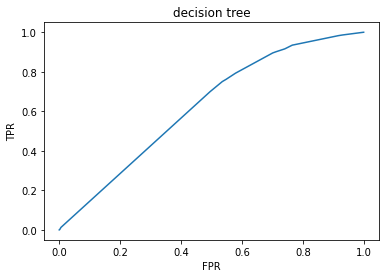

In [89]:
ROCcurve(dtpre, 'decision tree','FPR','TPR')

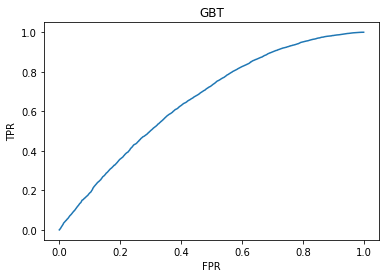

In [90]:
ROCcurve(gcpre, 'GBT','FPR','TPR')

5. Using the pipeline model you selected in the previous step, re-train the pipeline model using a bigger set of rebalanced training data, with top-up events and non-top up events being a 1:2 ratio, while using all top-up events data from the full data. Then persist the better models for each pipeline model.
- The models would be deployed in Part B of assignment 2.
- If your module spends too much time or cracks due to limit memory, try to rechoose the columns, As the server provided by MonPG only has limited performance.


In [91]:
train235, test235 = df133.randomSplit([0.8, 0.2], seed = 2020)
train2350 = train235[train235['Top-up'] == 0]
train2351 = train235[train235['Top-up'] == 1]

In [92]:
train2351_20 = train2351.sample(fraction = 1.0)
train2350_20 = train2350.sample(fraction = train2351_20.count()*2/train2350.count())

In [93]:
train235_20 = train2350_20.union(train2351_20).cache() #merge sample train2350_20 and train2351_20
train235_20.groupBy('Top-up').count().show()

+------+-----+
|Top-up|count|
+------+-----+
|     1|25075|
|     0|49904|
+------+-----+



In [95]:
catcol_new = ['PaymentMode','SEX','Top-up','ACCOUNT-STATUS_dist']
numcol_new = ['LTV','AGE','ZiPCODE','MonthlyIncome']

In [96]:
dt_new = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label')
gc_new = GBTClassifier(featuresCol = 'features', labelCol = 'label')

In [97]:
pipeline = Pipeline(stages = Feature_Engineering(catcol_new,numcol_new))
transfomer = pipeline.fit(df133)

In [98]:
training_new = transfomer.transform(train235_20)
testing_new = transfomer.transform(test235)


In [101]:
print('GBTClassifier')
print('----------------')
gc_model_new = gc.fit(training_new)
gcpre_new = gc_model_new.transform(testing_new)
gcpre_new.groupBy('label','prediction').count().show()

GBTClassifier
----------------


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  768|
|  0.0|       1.0|  864|
|  1.0|       0.0| 5663|
|  0.0|       0.0|17133|
+-----+----------+-----+



In [102]:
print('DecisionTreeClassifier')
print('----------------')
dt_model_new = dt.fit(training_new)
dtpre_new = dt_model_new.transform(testing_new)
dtpre_new.groupBy('label','prediction').count().show()

DecisionTreeClassifier
----------------


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|  572|
|  0.0|       1.0|  772|
|  1.0|       0.0| 5859|
|  0.0|       0.0|17225|
+-----+----------+-----+



In [103]:
gc_model_new.save('gc_model_new')
dt_model_new.save('dt_model_new')

22/10/01 11:54:01 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
22/10/01 11:54:01 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 84.44% for 9 writers
22/10/01 11:54:01 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 76.00% for 10 writers
22/10/01 11:54:02 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 84.44% for 9 writers
22/10/01 11:54:02 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
22/10/01 11:54:03 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
22/10/01 11:54:03 WARN MemoryManager: Total allocation exceeds 95.00%

# 3. Knowledge sharing (10%)

In addition to building the machine learning models, the IT manager from MonPG would like to learn more about the internals of Spark ML, and plan to replace existing scikit learn clustering logic by Spark KMeans clustering to cater large amounts of data. You are expected to combine the theory from the lecture and the observation from Spark UI to explain what happens when training the KMeans clustering model.

## 3.1 How many jobs are observed when training the KMeans clustering model following the code below? Provide a screenshot from Spark UI for running a simple KMeans model training from the provided data (0.5%)

In [105]:
spark.stop()

In [107]:
master = "local[2]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "ass2_kmeans"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# Import SparkSession classes 
from pyspark.sql import SparkSession # Spark SQL

#TODO : Initialize Spark Session and create a SparkContext Object
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()


In [108]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

In [109]:
test_df = spark.createDataFrame([[0, 35.3, 37.5], [1, 41.4, -23.5],
[2, 28.3, -13.3],
[3, 09.5, -9.0],
[4, 62.8, -18.23],
[5, 63.8, -18.33],
[6, 82.8, -17.23],
[7, 52.8, -13.43],
[8, 72.8, 48.23],
[9, 65.8, 15.43],
[10, 42.8, -13.23] ], ["ID","Att_1", "Att_2"])
assembler = VectorAssembler( inputCols=["Att_1", "Att_2"],
outputCol='features')
kmeans = KMeans(k=4).fit(assembler.transform(test_df))

In [110]:
spark.sparkContext.uiWebUrl

'http://localhost:4047'

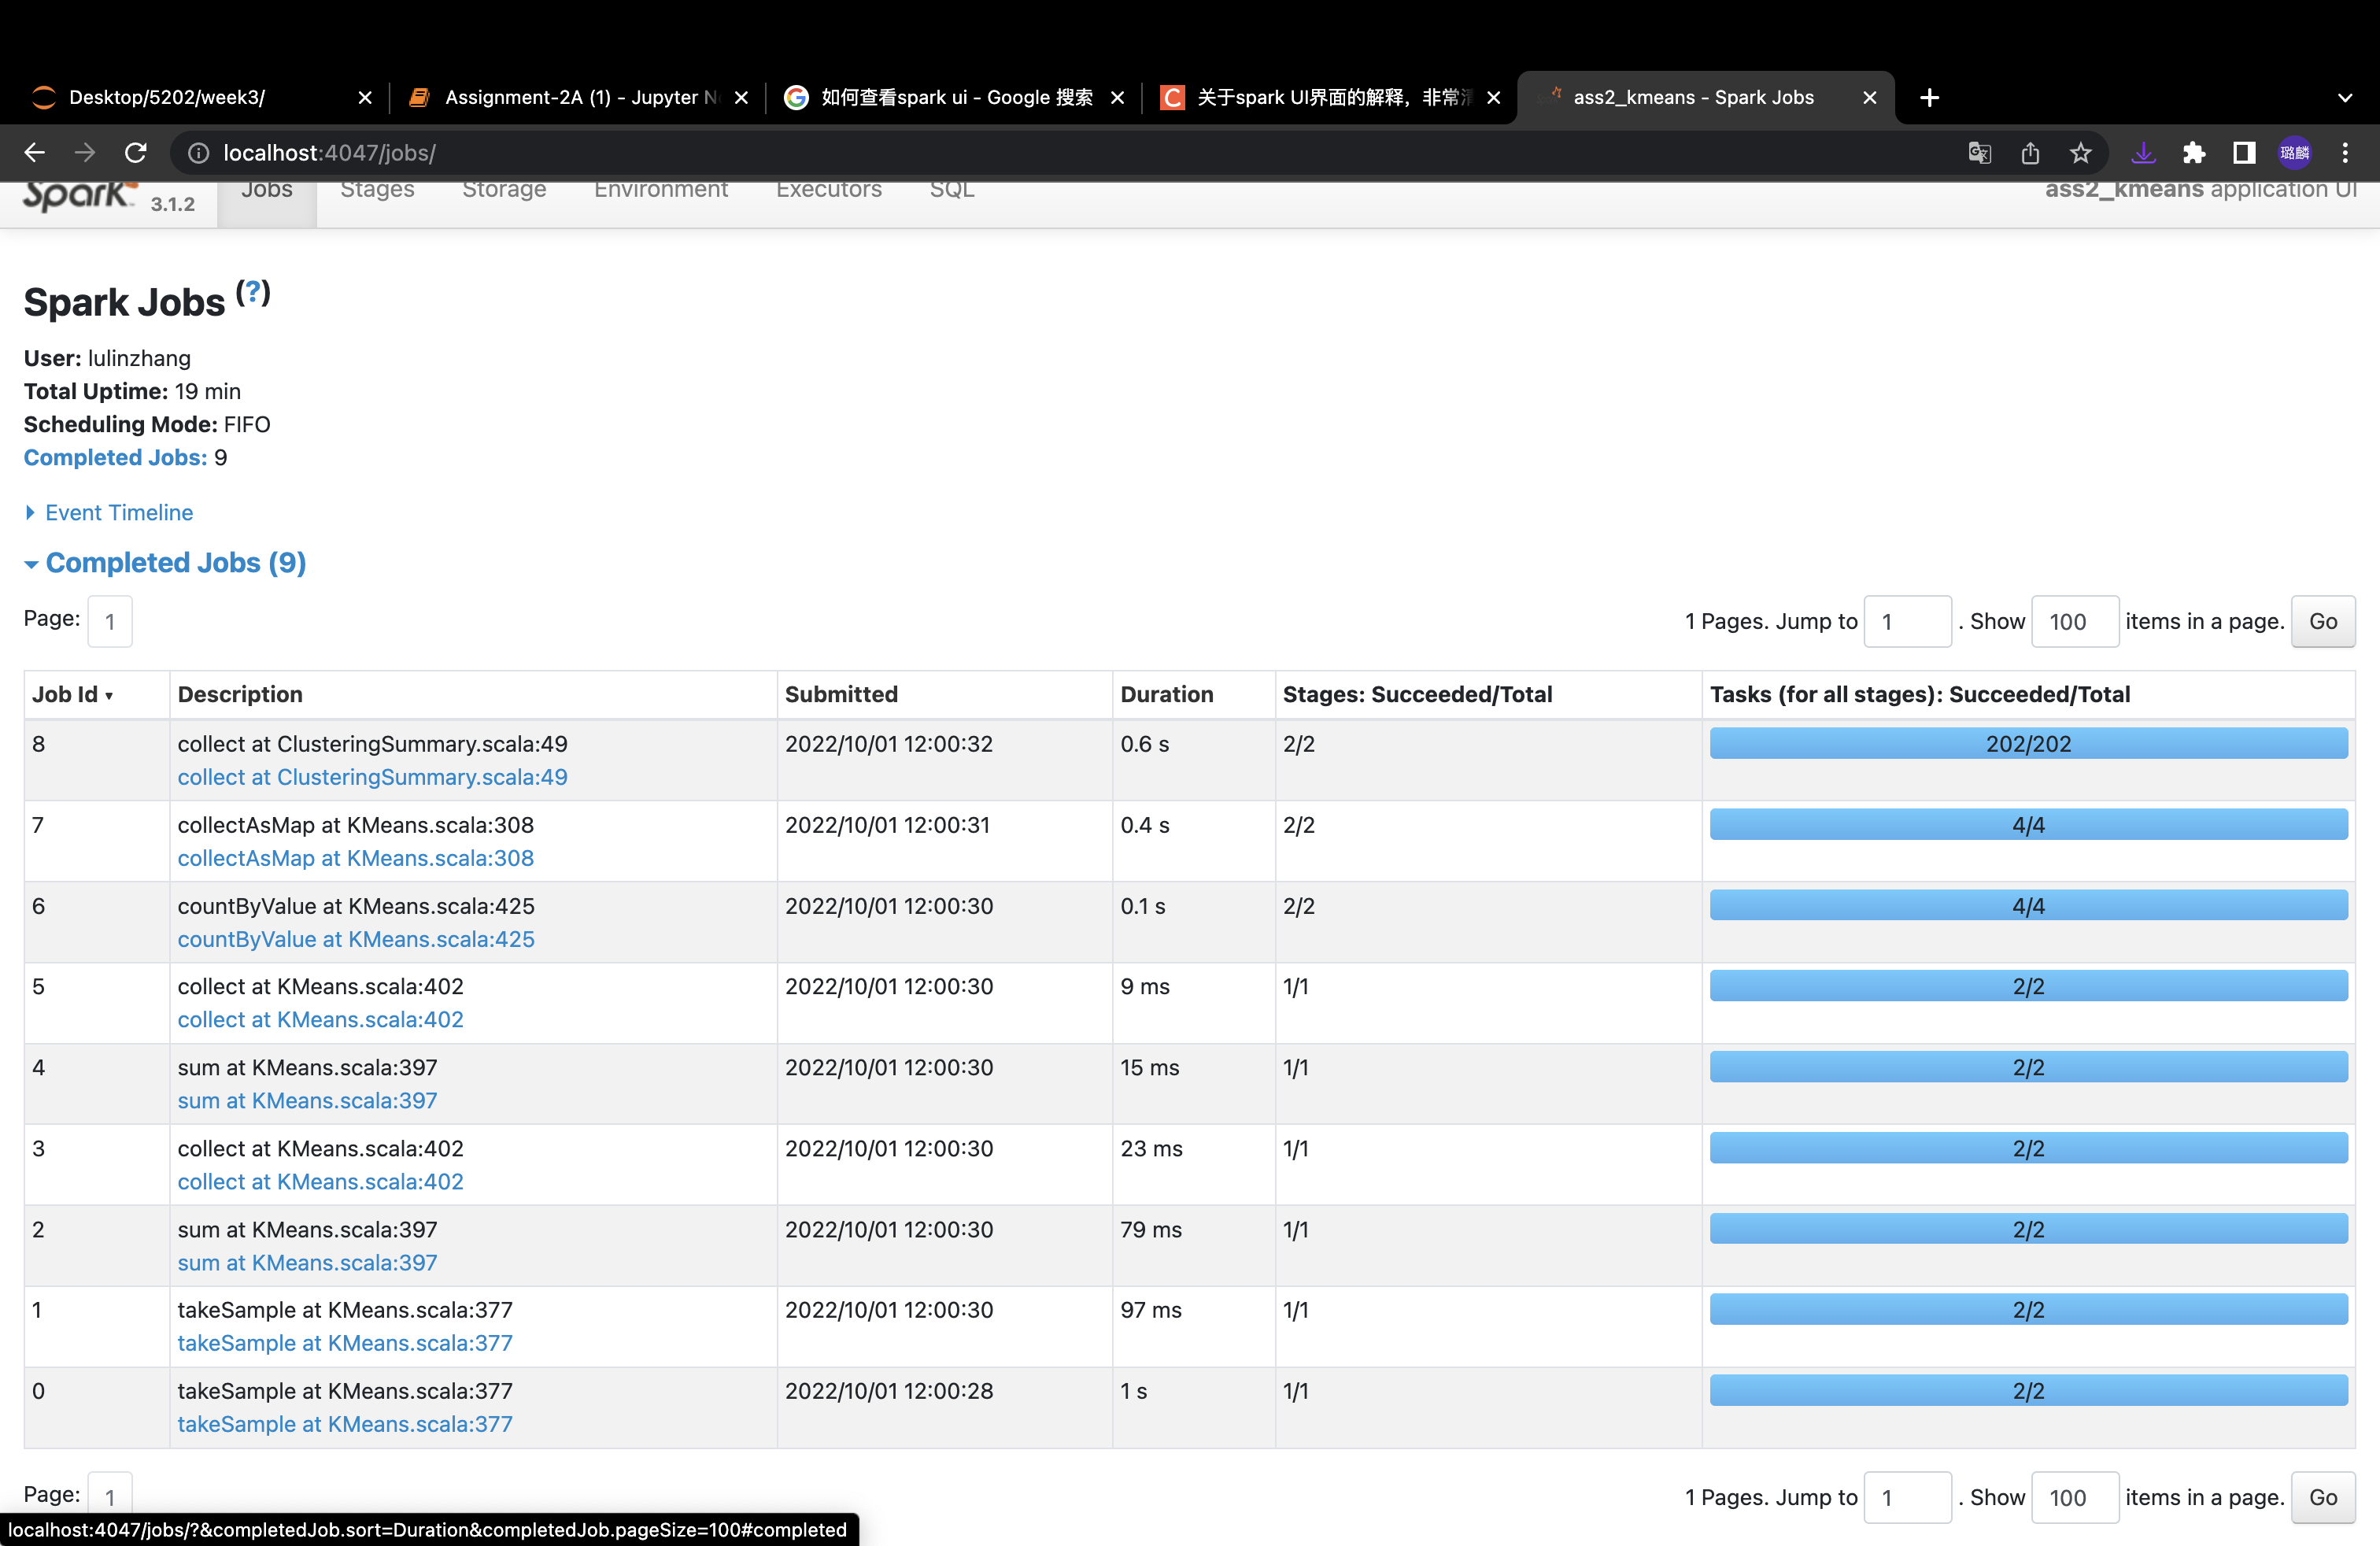

total have 12 jobs are observed when training the KMeans clustering model following the code below

## 3.2 What method or what kmeans method is used to choose the initial center by default in spark? What will it do if it generates a number of centers more than 'k'?(9.5%)
- 300 words max for the discussion
- Hint - you can also refer to the Spark source code on GitHub
https://github.com/apache/spark/blob/master/mllib/src/main/scala/org/apache/spark/ mllib/clustering/KMeans.scala

the default method is clustering analysis.

The basic idea of KMeans algorithm is to randomly give K cluster centers at the beginning, distribute the sample points to each cluster according to the nearest neighbor principle, and then recalculate the centroid of each cluster according to the average method, so as to determine the new cluster center. Iterate until the cluster center moves less than some given value.

K-means clustering algorithm is mainly divided into three steps:
- (1) The first step is to find the clustering center for the points to be clustered
- (2) The second step is to calculate the distance from each point to the cluster center, and cluster each point into the cluster closest to the point
- (3) The third step is to calculate the coordinate average value of all points in each cluster, and take this average value as the new cluster center